# Анализ продаж автомобилей в Казахстане (2019)
Очистка данных и анализ позиции автоцентра Меркур Авто


## Загрузка данных


In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [323]:
df = pd.read_csv('autokz2019.csv', sep=';', decimal=',')
print(f'Размер: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()


Размер: 39966 строк, 25 столбцов


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [324]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

In [325]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Пропуски': missing, 'Процент': missing_pct})
missing_df[missing_df['Пропуски'] > 0].sort_values('Процент', ascending=False)


,Пропуски,Процент
Форма расчета,25928,64.88
Тип клиента,7047,17.63
Сегмент,6761,16.92
Тип привода,4289,10.73
"Объём двиг, л,",4258,10.65
Модификация,3591,8.99
Коробка передач,3255,8.14
Вид топлива,3140,7.86
Год выпуска,501,1.25
Количество,6,0.02


In [326]:
# удаляем ненужные столбцы
cols_drop = ['Модификация', 'Тип клиента', 'Форма расчета', 'Сегмент', 'Сегментация Eng', 'Локализация производства']
df = df.drop(columns=cols_drop, errors='ignore')
print(f'Осталось столбцов: {df.shape[1]}')


Осталось столбцов: 19


In [327]:
# переименование на английский
col_map = {'Год': 'year', 'Месяц': 'month', 'Компания': 'company', 'Бренд': 'brand',
    'Модель': 'model', 'Год выпуска': 'production_year', 'Страна-производитель': 'country',
    'Вид топлива': 'fuel_type', 'Объём двиг, л,': 'engine_volume', 'Коробка передач': 'transmission',
    'Тип привода': 'drive_type', 'Регион': 'region', 'Наименование дилерского центра': 'dealer_name',
    'Количество': 'quantity', 'Цена, USD': 'price', 'Продажа, USD': 'total_sale',
    'Область': 'oblast', 'Сегментация 2013': 'segment_2013', 'Класс 2013': 'class_2013'}
df = df.rename(columns=col_map)
df.columns.tolist()


['year',
 'month',
 'company',
 'brand',
 'model',
 'production_year',
 'country',
 'fuel_type',
 'engine_volume',
 'transmission',
 'drive_type',
 'region',
 'dealer_name',
 'quantity',
 'price',
 'total_sale',
 'oblast',
 'segment_2013',
 'class_2013']

In [328]:
before = len(df)
df = df.dropna(how='all')
print(f'Удалено пустых строк: {before - len(df)}')


Удалено пустых строк: 0


In [329]:
before = len(df)
df = df.drop_duplicates()
print(f'Удалено дубликатов: {before - len(df)}, осталось: {len(df)} строк')


Удалено дубликатов: 21987, осталось: 17979 строк


## Очистка данных
### Страны (ALPHA-3)


In [330]:
df['country'].unique()


array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [331]:
country_map = {'Германия': 'DEU', 'Российская Федерация': 'RUS', 'Республика Казахстан': 'KAZ',
    'Япония': 'JPN', 'Корея': 'KOR', 'Южная Корея': 'KOR', 'Республика Корея': 'KOR',
    'Китай': 'CHN', 'США': 'USA', 'Соединённые Штаты Америки': 'USA', 'Великобритания': 'GBR',
    'Франция': 'FRA', 'Италия': 'ITA', 'Чехия': 'CZE', 'Чешская Республика': 'CZE',
    'Швеция': 'SWE', 'Испания': 'ESP', 'Индия': 'IND', 'Узбекистан': 'UZB', 'Беларусь': 'BLR',
    'Турция': 'TUR', 'Румыния': 'ROU', 'Мексика': 'MEX', 'Бразилия': 'BRA', 'Словакия': 'SVK',
    'Бельгия': 'BEL', 'Тайланд': 'THA', 'Таиланд': 'THA', 'Индонезия': 'IDN', 'Венгрия': 'HUN',
    'Австрия': 'AUT', 'Польша': 'POL', 'Канада': 'CAN', 'Аргентина': 'ARG', 'Нидерланды': 'NLD',
    'Португалия': 'PRT', 'Финляндия': 'FIN', 'ЮАР': 'ZAF', 'Украина': 'UKR', 'Малайзия': 'MYS',
    'Белоруссия': 'BLR', 'UK': 'GBR'}
df['country'] = df['country'].map(country_map)
df['country'].value_counts()


country
KAZ    8974
RUS    5419
JPN    2056
TUR     391
THA     350
DEU     245
USA     241
GBR     174
AUT      30
CHN      20
KOR      16
SWE      15
UZB      14
NLD      11
ESP       9
BEL       6
POL       5
HUN       2
BLR       1
Name: count, dtype: int64

### Топливо


In [332]:
df['fuel_type'].unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

In [333]:
fuel_map = {'Бензин': 'F', 'бензин': 'F', 'Дизель': 'D', 'дизель': 'D',
    'Электро': 'E', 'электро': 'E', 'Электричество': 'E', 'Гибрид': 'HYB', 'гибрид': 'HYB'}
df['fuel_type'] = df['fuel_type'].str.strip().map(fuel_map)
df['fuel_type'].value_counts()

fuel_type
F      16124
D        640
HYB        9
E          4
Name: count, dtype: int64

### Привод


In [334]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [335]:
drive_map = {'передний': 'FWD', 'Передний': 'FWD', 'FWD': 'FWD', 'FF': 'FWD', 'Передний (FF)': 'FWD',
    'задний': 'RWD', 'Задний': 'RWD', 'RWD': 'RWD', 'полный': '4WD', 'Полный': '4WD',
    '4WD': '4WD', 'AWD': '4WD', 'quattro': '4WD', '4x4': '4WD', '4х4': '4WD', '4X4': '4WD',
    '4 WD': '4WD', '4Motion': '4WD', '2WD': 'FWD', '2 WD': 'FWD'}
df['drive_type'] = df['drive_type'].str.strip().map(drive_map)
df['drive_type'].value_counts()

drive_type
4WD    7690
FWD    7669
RWD    1075
Name: count, dtype: int64

### Числовые столбцы


In [336]:
print(f"quantity: {df['quantity'].dtype}, price: {df['price'].dtype}, total_sale: {df['total_sale'].dtype}")


quantity: float64, price: float64, total_sale: float64


In [337]:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['total_sale'] = pd.to_numeric(df['total_sale'], errors='coerce')
print(f"Возвраты (qty<0): {len(df[df['quantity'] < 0])}")
df['quantity'].describe()

Возвраты (qty<0): 1


count    17973.000000
mean         1.770879
std          3.488180
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: quantity, dtype: float64

In [338]:
# оптовые заказы
df[df['quantity'] > 10][['brand', 'model', 'quantity', 'dealer_name']].head(10)

,brand,model,quantity,dealer_name
175,BMW,X5,11.0,Автоцентр-Бавария Астана
867,Foton,BJ3253DMPKB-AD,19.0,Вираж Семей
9630,Hyundai Truck & Bus,H350,19.0,Hyundai Auto Almaty
9690,Hyundai Truck & Bus,HD 78,12.0,Hyundai Auto Almaty
13699,Jac,S3,70.0,Allur Auto Almaty
14839,Jac,S5,29.0,Allur Auto Almaty
14840,Jac,S5,12.0,Allur Auto Almaty
15968,Kia,Cerato,18.0,БИПЭК АВТО Алматы
16015,Kia,Cerato,37.0,БИПЭК АВТО Караганда
16060,Kia,Cerato,12.0,БИПЭК АВТО Астана


### Дата продажи


In [339]:
df['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [340]:
from calendar import monthrange
month_map = {'Январь': 1, 'Февраль': 2, 'Март': 3, 'Апрель': 4, 'Май': 5, 'Июнь': 6,
    'Июль': 7, 'Август': 8, 'Сентябрь': 9, 'Октябрь': 10, 'Ноябрь': 11, 'Декабрь': 12}
df['month_num'] = df['month'].map(month_map)
def get_last_day(row):
    if pd.isna(row['year']) or pd.isna(row['month_num']):
        return None
    year, month = int(row['year']), int(row['month_num'])
    return f"{year}-{month:02d}-{monthrange(year, month)[1]:02d}"
df['sale_date'] = pd.to_datetime(df.apply(get_last_day, axis=1))
df = df.drop(columns=['year', 'month', 'month_num'])
df['sale_date'].head()

0   2019-05-31
1   2019-08-31
2   2019-04-30
3   2019-07-31
5   2019-02-28
Name: sale_date, dtype: datetime64[ns]

### Название компании


In [341]:
df[df['company'].str.contains('ercur|еркур', case=False, na=False)]['company'].unique()

array(['Mercur Auto', 'Mercur Autos'], dtype=object)

In [342]:
df['company'] = df['company'].replace({'Mercur Auto': 'Меркур Авто', 'MERCUR AUTO': 'Меркур Авто',
    'mercur auto': 'Меркур Авто', 'Меркур авто': 'Меркур Авто', 'МЕРКУР АВТО': 'Меркур Авто'})
df[df['company'].str.contains('еркур', case=False, na=False)]['company'].unique()

array(['Меркур Авто'], dtype=object)

### Объем двигателя


In [343]:
df['engine_volume'].unique()[:20]


array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7'], dtype=object)

In [344]:
def clean_engine(val):
    if pd.isna(val): return np.nan
    val = str(val).replace('L', '').replace('l', '').strip().replace(',', '.')
    try: return float(val)
    except: return np.nan
df['engine_volume'] = df['engine_volume'].apply(clean_engine)
df['engine_volume'].describe()


count    14764.000000
mean         2.355782
std          1.122726
min          0.000000
25%          1.600000
50%          2.000000
75%          2.700000
max         26.700000
Name: engine_volume, dtype: float64

In [345]:
# аномалии
df[df['engine_volume'] > 10][['brand', 'model', 'engine_volume']].drop_duplicates()


,brand,model,engine_volume
399,Chevrolet,Niva,26.7
400,Chevrolet,Niva,25.7
401,Chevrolet,Niva,24.7
402,Chevrolet,Niva,23.7
403,Chevrolet,Niva,22.7
404,Chevrolet,Niva,21.7
405,Chevrolet,Niva,20.7
406,Chevrolet,Niva,19.7
407,Chevrolet,Niva,18.7
408,Chevrolet,Niva,17.7


In [346]:
# исправляем аномалии
df.loc[(df['brand'] == 'Chevrolet') & (df['model'] == 'Niva') & (df['engine_volume'] > 10), 'engine_volume'] = 1.7
df.loc[(df['brand'] == 'Jaguar') & (df['engine_volume'] > 100), 'engine_volume'] = 4.0
df[df['engine_volume'] > 10][['brand', 'model', 'engine_volume']].drop_duplicates()


,brand,model,engine_volume
9699,Hyundai Truck & Bus,Universe,12.3
20212,MAN,TG,10.5
20386,Mercedes-Benz Trucks,Actros,12.0
20387,Mercedes-Benz Trucks,Actros,12.8
20389,Mercedes-Benz Trucks,Actros,11.0
20402,Mercedes-Benz Trucks,Tourismo,12.0
25430,Scania,G-Series,13.0
25431,Scania,P-Series,13.0
25433,Scania,R-Series,13.0
39181,Scania,S-Series,13.0


### Регион


In [347]:
df['region'].unique()


array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

In [348]:
df['region'] = df['region'].str.title()
df['oblast'] = df['oblast'].str.title()
df['region'].unique()


array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'Экспорт', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

### Трансмиссия


In [349]:
df['transmission'].unique()


array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '4WD', 'Передний', '0', '7 DSG',
       '7DSG', '6 DSG', '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T',
       'M/T', 'МКП', '5М', 'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI',
       '9AT', 'РЕДУКТОР'], dtype=object)

In [350]:
def classify_trans(val):
    if pd.isna(val): return np.nan
    val = str(val).lower().strip()
    if any(x in val for x in ['mt', 'мех', 'механ', 'мкпп', 'мт', '/m', '5m', '6m']): return 'Механика'
    if any(x in val for x in ['at', 'авт', 'акпп', 'cvt', 'dsg', 'tronic', 'pdk', 'акп', 'ат']): return 'Автомат'
    return np.nan
df['transmission'] = df['transmission'].apply(classify_trans)
df['transmission'].value_counts()


transmission
Автомат     11506
Механика     5157
Name: count, dtype: int64

### Преобразование типов


In [351]:
cat_cols = ['fuel_type', 'transmission', 'drive_type', 'segment_2013', 'class_2013']
for col in cat_cols:
    if col in df.columns: df[col] = df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17979 entries, 0 to 39951
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          17979 non-null  object        
 1   brand            17979 non-null  object        
 2   model            17979 non-null  object        
 3   production_year  17780 non-null  object        
 4   country          17979 non-null  object        
 5   fuel_type        16777 non-null  category      
 6   engine_volume    14764 non-null  float64       
 7   transmission     16663 non-null  category      
 8   drive_type       16434 non-null  category      
 9   region           17979 non-null  object        
 10  dealer_name      17979 non-null  object        
 11  quantity         17973 non-null  float64       
 12  price            17979 non-null  float64       
 13  total_sale       17979 non-null  float64       
 14  oblast           17979 non-null  object    

In [352]:
print(f'Итого: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()


Итого: 17979 строк, 18 столбцов


,company,brand,model,production_year,country,fuel_type,engine_volume,transmission,drive_type,region,dealer_name,quantity,price,total_sale,oblast,segment_2013,class_2013,sale_date
0,Меркур Авто,Audi,A3,2018,DEU,F,1.4,Автомат,FWD,Алматы,Mercur Auto Алматы,1.0,28115.00000,28115.00000,Г.Алматы,Легковые автомобили,C класс,2019-05-31
1,Меркур Авто,Audi,A3,2018,DEU,F,1.4,Автомат,FWD,Алматы,Mercur Auto Алматы,1.0,32246.99000,32246.99000,Г.Алматы,Легковые автомобили,C класс,2019-08-31
2,Меркур Авто,Audi,A4,2018,DEU,F,1.4,Автомат,FWD,Алматы,Mercur Auto Алматы,1.0,32000.00000,32000.00000,Г.Алматы,Легковые автомобили,D класс,2019-04-30
3,Меркур Авто,Audi,A4,2018,DEU,F,1.4,Автомат,FWD,Алматы,Mercur Auto Алматы,1.0,31929.00000,31929.00000,Г.Алматы,Легковые автомобили,D класс,2019-07-31
5,Меркур Авто,Audi,A6,2017,DEU,F,2.0,Автомат,4WD,Нур-Султан,Mercur Auto Астана,1.0,42608.25485,42608.25485,Г.Нур-Султан,Легковые автомобили,E класс,2019-02-28


## EDA
### Статистика


In [353]:
df.describe()


,engine_volume,quantity,price,total_sale,sale_date
count,14764.000000,17973.000000,17979.000000,1.797900e+04,17979
mean,2.336208,1.770879,28163.530905,4.027747e+04,2019-06-04 08:23:23.237109760
min,0.000000,-1.000000,7100.000000,-3.558825e+04,2019-01-31 00:00:00
25%,1.600000,1.000000,15022.307455,1.717518e+04,2019-03-31 00:00:00
50%,2.000000,1.000000,21531.377240,2.645564e+04,2019-05-31 00:00:00
75%,2.700000,1.000000,32527.004650,4.186120e+04,2019-07-31 00:00:00
max,13.000000,115.000000,328510.970600,3.778206e+06,2019-09-30 00:00:00
std,0.961966,3.488180,21367.955169,7.183645e+04,NaN


In [354]:
total_cars = df['quantity'].sum()
total_rev = df['total_sale'].sum()
print(f'Продано: {total_cars:,.0f}, выручка: ${total_rev:,.0f}, средняя цена: ${total_rev/total_cars:,.0f}')


Продано: 31,828, выручка: $724,148,667, средняя цена: $22,752


### Цены


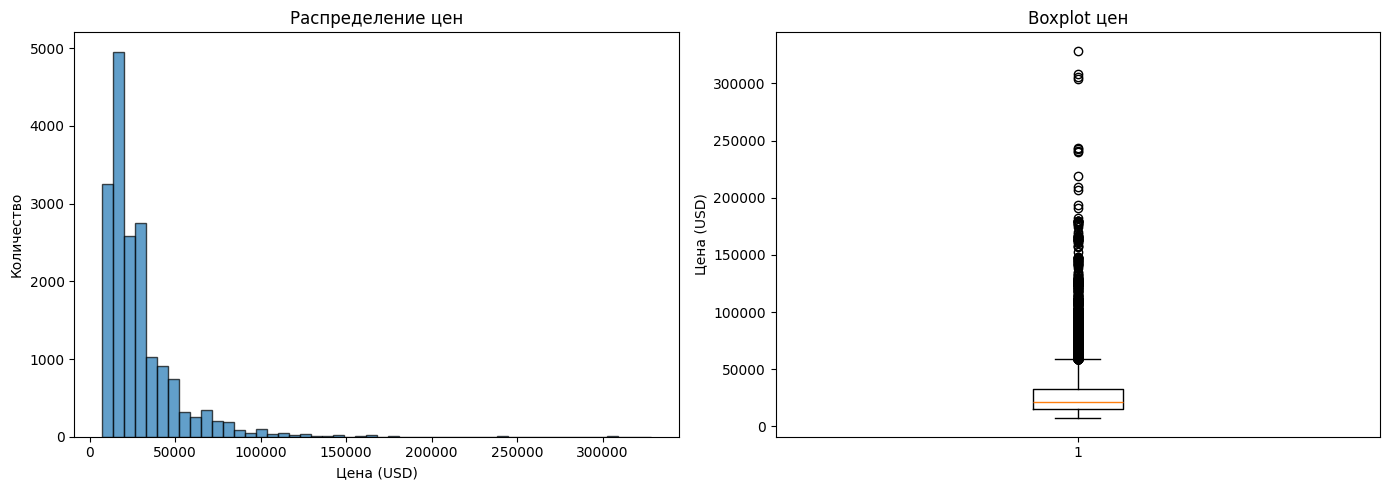

Медиана: $21,531, среднее: $28,164


In [355]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['price'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Цена (USD)')
axes[0].set_ylabel('Количество')
axes[0].set_title('Распределение цен')
axes[1].boxplot(df['price'].dropna())
axes[1].set_ylabel('Цена (USD)')
axes[1].set_title('Boxplot цен')
plt.tight_layout()
plt.show()
print(f'Медиана: ${df["price"].median():,.0f}, среднее: ${df["price"].mean():,.0f}')


### Объемы двигателей


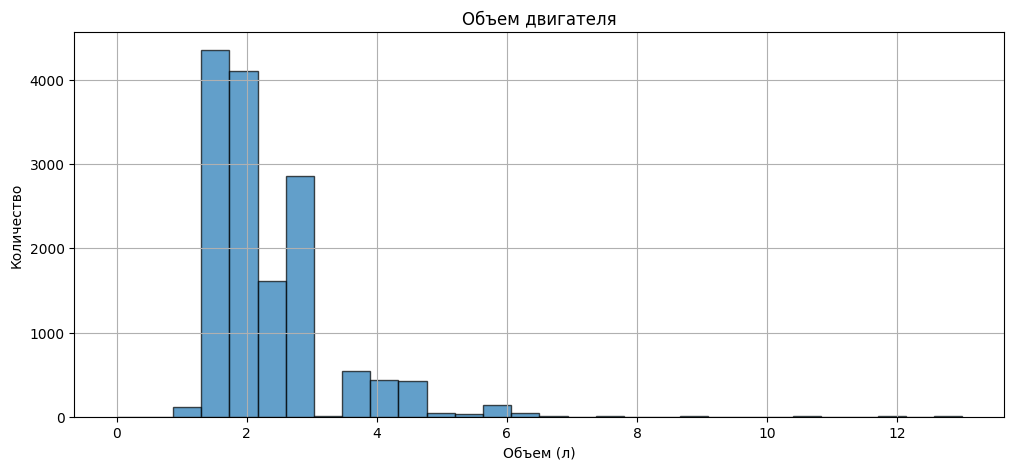

Средний: 2.34 л, медиана: 2.00 л


In [356]:
fig, ax = plt.subplots(figsize=(12, 5))
df['engine_volume'].dropna().hist(bins=30, edgecolor='black', alpha=0.7, ax=ax)
ax.set_xlabel('Объем (л)')
ax.set_ylabel('Количество')
ax.set_title('Объем двигателя')
plt.show()
print(f'Средний: {df["engine_volume"].mean():.2f} л, медиана: {df["engine_volume"].median():.2f} л')


### Год выпуска


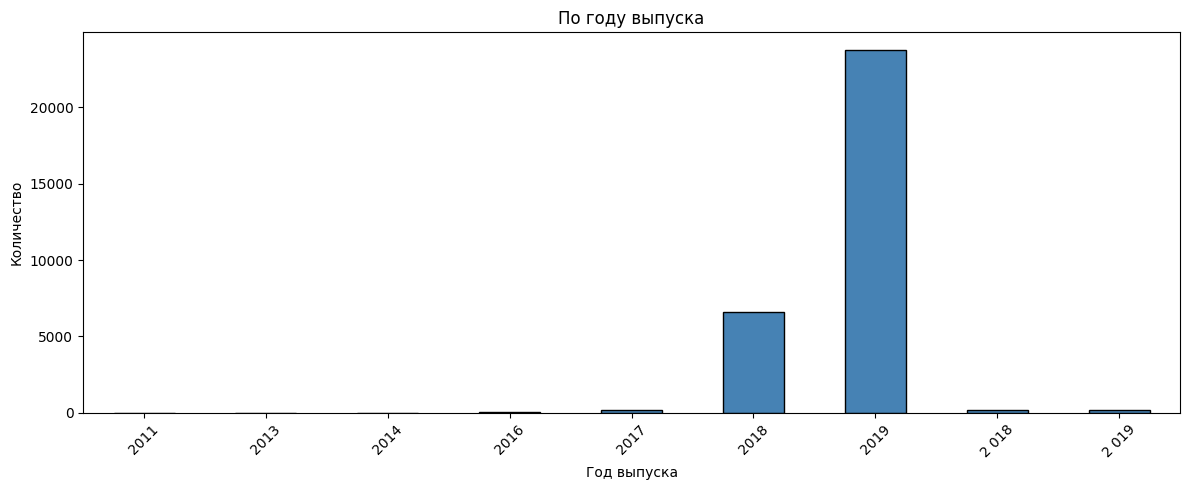

In [357]:
year_cnt = df.groupby('production_year')['quantity'].sum().sort_index()
fig, ax = plt.subplots(figsize=(12, 5))
year_cnt.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество')
ax.set_title('По году выпуска')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Бренды


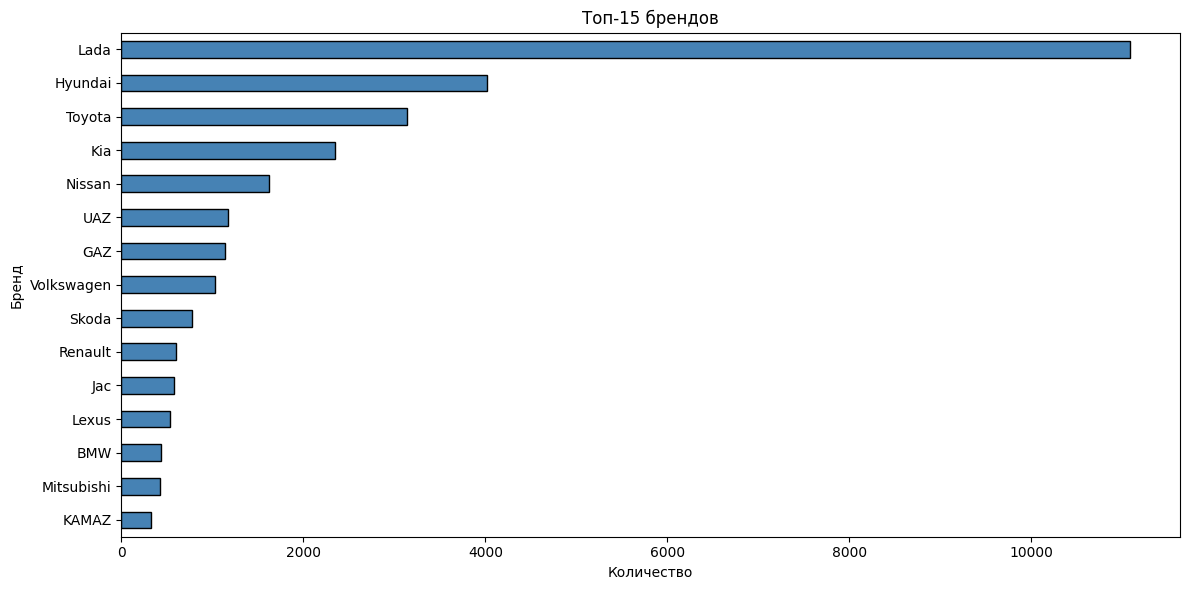

brand
Lada          11079.0
Hyundai        4017.0
Toyota         3134.0
Kia            2346.0
Nissan         1625.0
UAZ            1166.0
GAZ            1139.0
Volkswagen     1024.0
Skoda           776.0
Renault         595.0
Name: quantity, dtype: float64

In [358]:
brand_sales = df.groupby('brand')['quantity'].sum().sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(12, 6))
brand_sales.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Количество')
ax.set_ylabel('Бренд')
ax.set_title('Топ-15 брендов')
ax.invert_yaxis()
plt.tight_layout()
plt.show()
brand_sales.head(10)


### Регионы


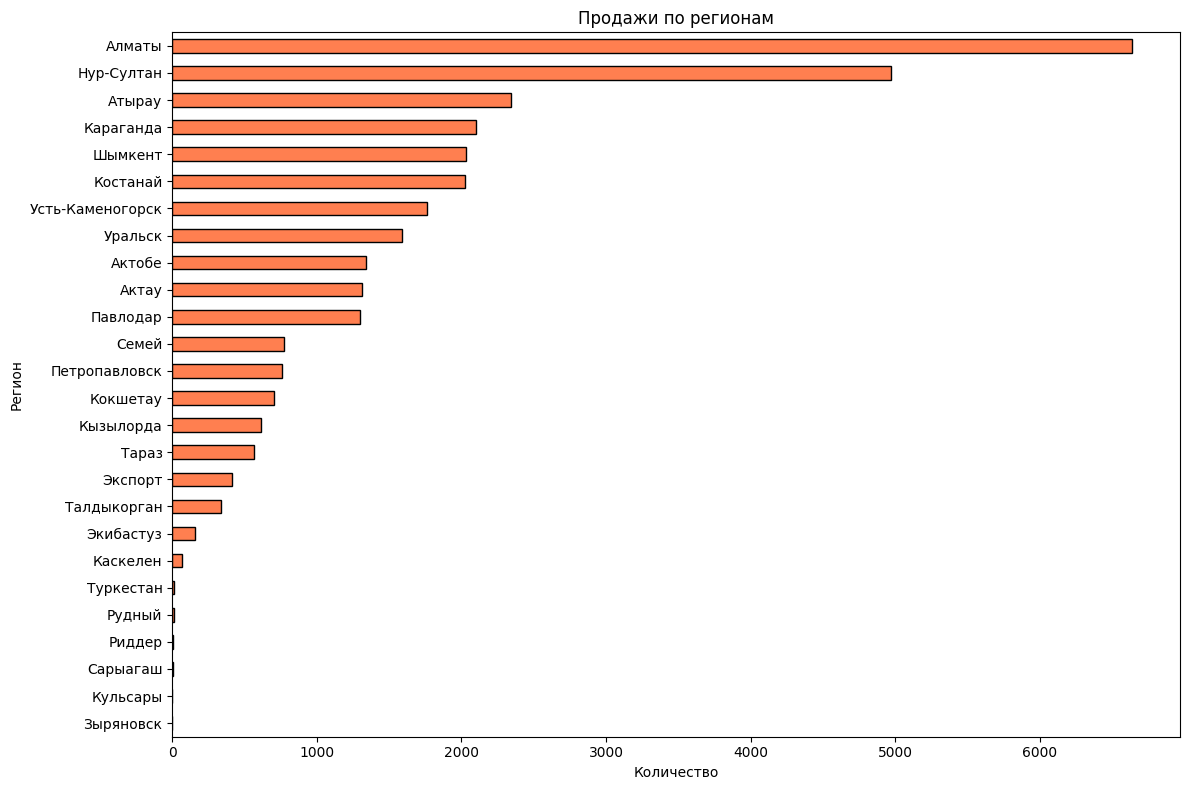

In [359]:
region_sales = df.groupby('region')['quantity'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
region_sales.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel('Количество')
ax.set_ylabel('Регион')
ax.set_title('Продажи по регионам')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


### Топливо


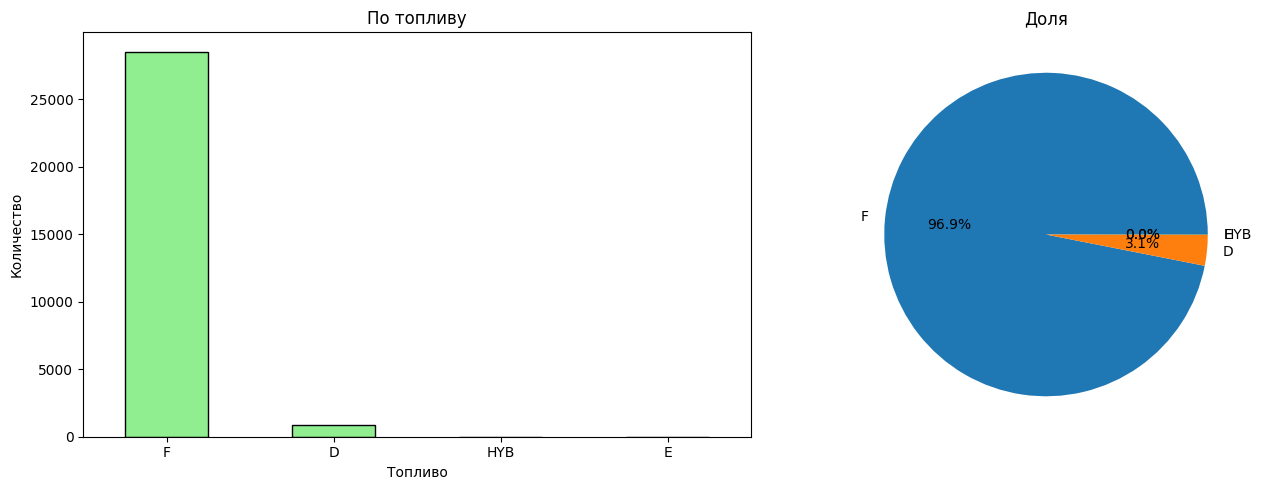

In [360]:
fuel_sales = df.groupby('fuel_type')['quantity'].sum().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fuel_sales.plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_xlabel('Топливо')
axes[0].set_ylabel('Количество')
axes[0].set_title('По топливу')
axes[0].tick_params(axis='x', rotation=0)
fuel_sales.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].set_title('Доля')
plt.tight_layout()
plt.show()


### Трансмиссия


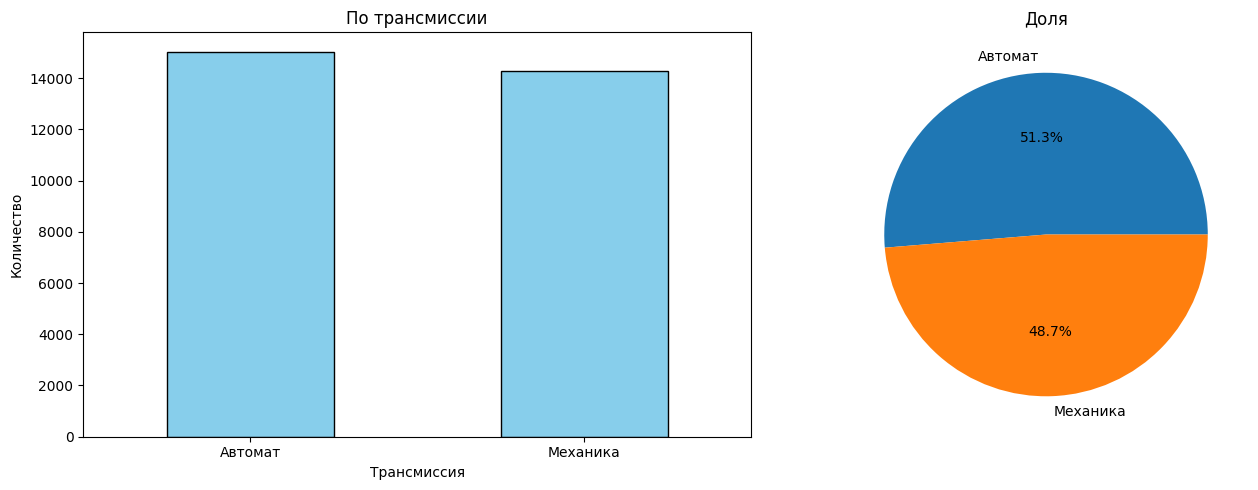

In [361]:
trans_sales = df.groupby('transmission')['quantity'].sum().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
trans_sales.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Трансмиссия')
axes[0].set_ylabel('Количество')
axes[0].set_title('По трансмиссии')
axes[0].tick_params(axis='x', rotation=0)
trans_sales.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].set_title('Доля')
plt.tight_layout()
plt.show()


### Динамика по месяцам


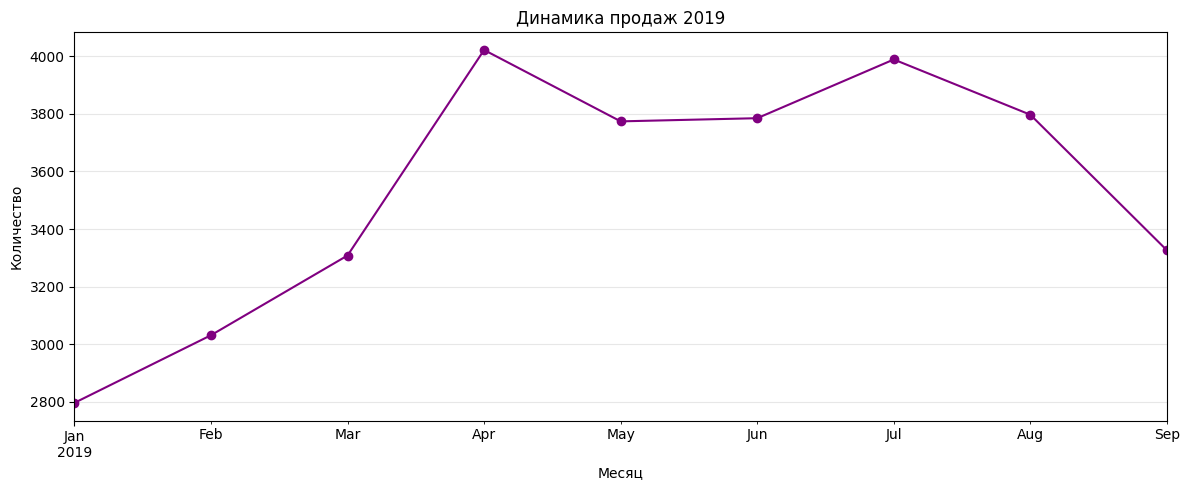

In [362]:
monthly_sales = df.groupby('sale_date')['quantity'].sum()
fig, ax = plt.subplots(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', ax=ax, color='purple')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество')
ax.set_title('Динамика продаж 2019')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Меркур Авто


In [363]:
mercur = df[df['company'] == 'Меркур Авто'].copy()
print(f'Меркур Авто: {len(mercur)} записей')


Меркур Авто: 365 записей


### Доля рынка


In [364]:
total_market = df['quantity'].sum()
mercur_sales = mercur['quantity'].sum()
mercur_share = mercur_sales / total_market * 100
print(f'Рынок: {total_market:,.0f}, Меркур: {mercur_sales:,.0f}, доля: {mercur_share:.2f}%')


Рынок: 31,828, Меркур: 372, доля: 1.17%


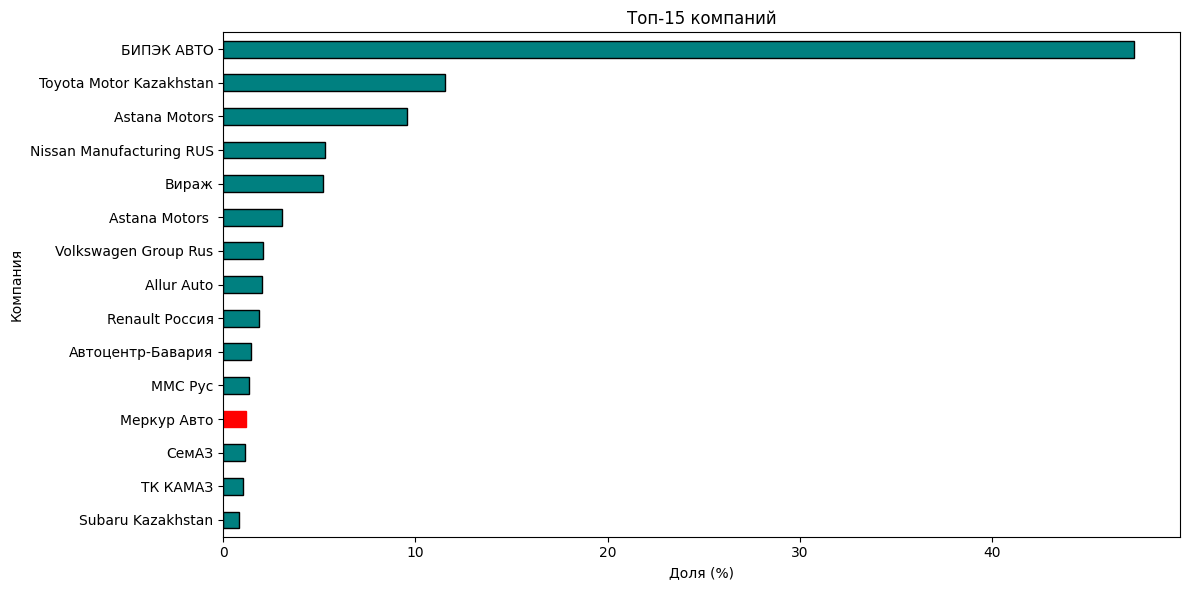

company
БИПЭК АВТО                  47.42
Toyota Motor Kazakhstan     11.52
Astana Motors                9.56
Nissan Manufacturing RUS     5.29
Вираж                        5.18
Astana Motors                3.07
Volkswagen Group Rus         2.05
Allur Auto                   2.02
Renault Россия               1.87
Автоцентр-Бавария            1.42
Name: quantity, dtype: float64

In [365]:
company_sales = df.groupby('company')['quantity'].sum().sort_values(ascending=False)
company_share = (company_sales / total_market * 100).head(15)
fig, ax = plt.subplots(figsize=(12, 6))
company_share.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
ax.set_xlabel('Доля (%)')
ax.set_ylabel('Компания')
ax.set_title('Топ-15 компаний')
ax.invert_yaxis()
if 'Меркур Авто' in company_share.index:
    ax.patches[list(company_share.index).index('Меркур Авто')].set_color('red')
plt.tight_layout()
plt.show()
company_share.head(10).round(2)


### Бренды


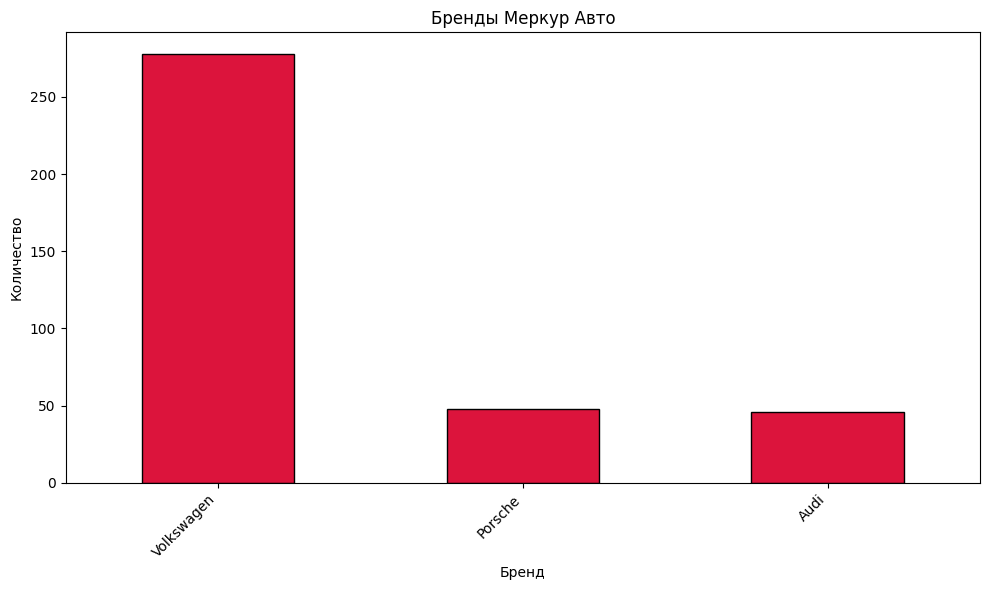

brand
Volkswagen    278.0
Porsche        48.0
Audi           46.0
Name: quantity, dtype: float64

In [366]:
mercur_brands = mercur.groupby('brand')['quantity'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
mercur_brands.plot(kind='bar', ax=ax, color='crimson', edgecolor='black')
ax.set_xlabel('Бренд')
ax.set_ylabel('Количество')
ax.set_title('Бренды Меркур Авто')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
mercur_brands


### Средний чек


In [367]:
mercur_avg = mercur['price'].mean()
market_avg = df['price'].mean()
print(f'Меркур: ${mercur_avg:,.0f}, Рынок: ${market_avg:,.0f}, Разница: {((mercur_avg/market_avg - 1) * 100):+.0f}%')


Меркур: $38,443, Рынок: $28,164, Разница: +37%


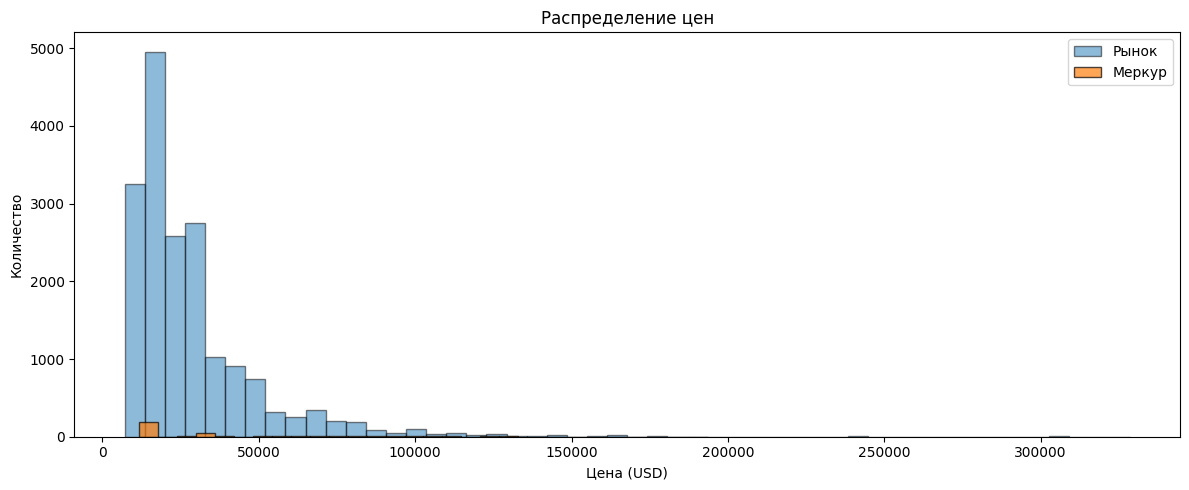

In [368]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['price'].dropna(), bins=50, alpha=0.5, label='Рынок', edgecolor='black')
ax.hist(mercur['price'].dropna(), bins=30, alpha=0.7, label='Меркур', edgecolor='black')
ax.set_xlabel('Цена (USD)')
ax.set_ylabel('Количество')
ax.set_title('Распределение цен')
ax.legend()
plt.tight_layout()
plt.show()


### Регионы


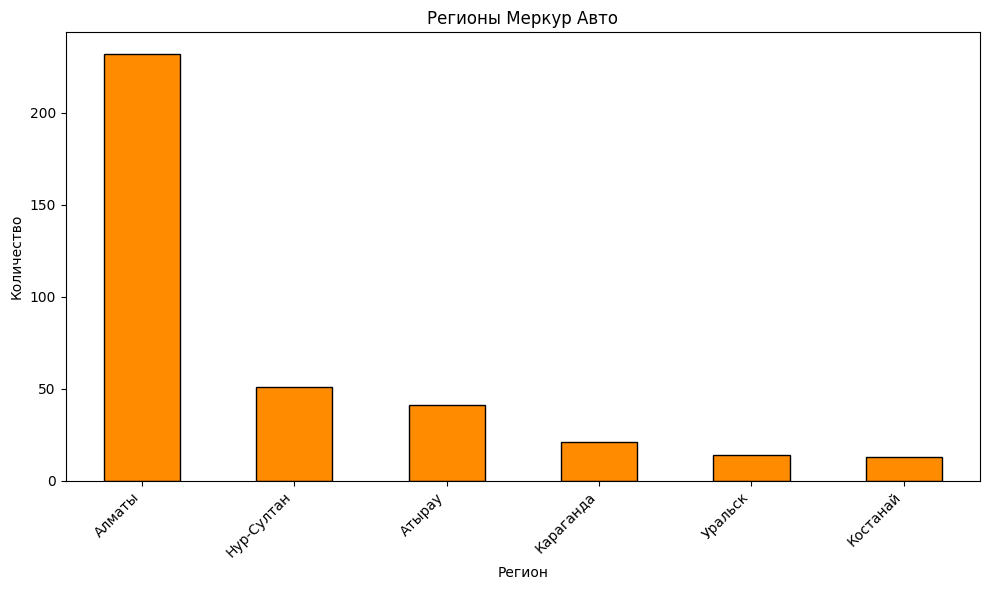

region
Алматы        232.0
Нур-Султан     51.0
Атырау         41.0
Караганда      21.0
Уральск        14.0
Костанай       13.0
Name: quantity, dtype: float64

In [369]:
mercur_regions = mercur.groupby('region')['quantity'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
mercur_regions.plot(kind='bar', ax=ax, color='darkorange', edgecolor='black')
ax.set_xlabel('Регион')
ax.set_ylabel('Количество')
ax.set_title('Регионы Меркур Авто')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
mercur_regions


### Сегменты


In [370]:
market_seg = df.groupby('segment_2013')['quantity'].sum()
mercur_seg = mercur.groupby('segment_2013')['quantity'].sum()
seg_cmp = pd.DataFrame({'Рынок': market_seg, 'Меркур': mercur_seg}).fillna(0)
seg_cmp['% рынка'] = seg_cmp['Рынок'] / seg_cmp['Рынок'].sum() * 100
seg_cmp['% Меркур'] = seg_cmp['Меркур'] / seg_cmp['Меркур'].sum() * 100
seg_cmp.round(2)


,Рынок,Меркур,% рынка,% Меркур
segment_2013,,,,
Внедорожники,12712.0,140.0,39.94,37.63
Коммерческие автомобили,3133.0,8.0,9.84,2.15
Легковые автомобили,13851.0,217.0,43.52,58.33
Минивэны,1791.0,5.0,5.63,1.34
Пикапы,341.0,2.0,1.07,0.54


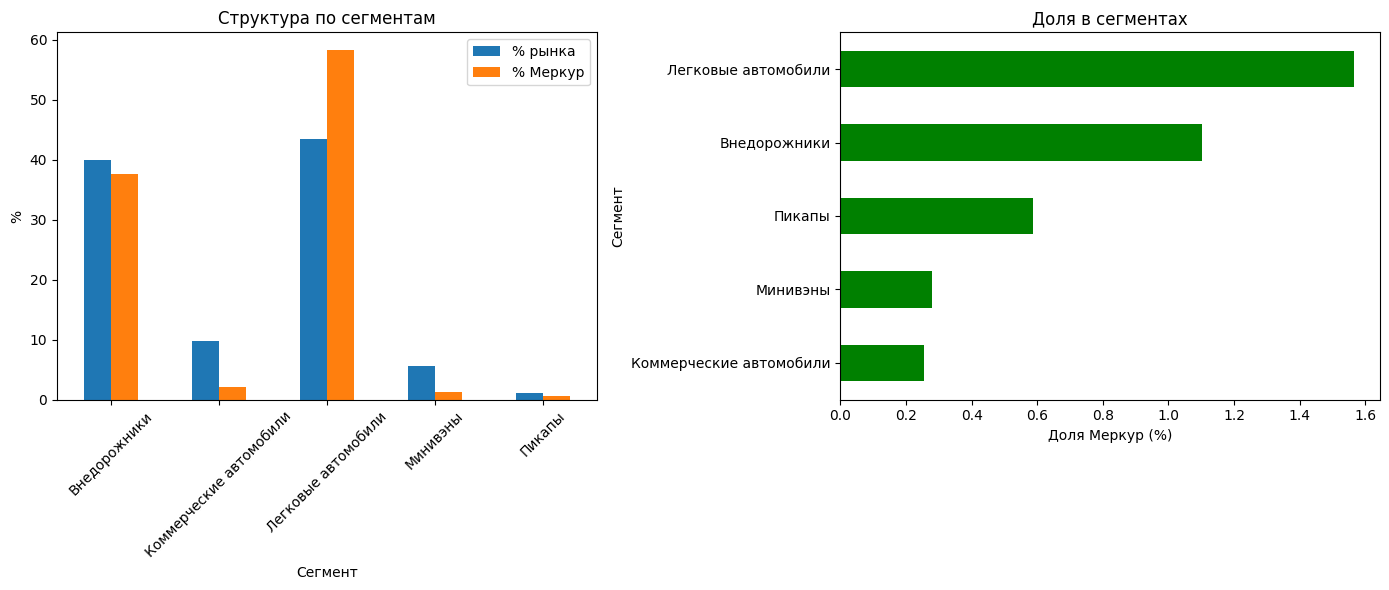

In [371]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
seg_cmp[['% рынка', '% Меркур']].plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Сегмент')
axes[0].set_ylabel('%')
axes[0].set_title('Структура по сегментам')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
seg_cmp['доля в сегм'] = seg_cmp['Меркур'] / seg_cmp['Рынок'] * 100
seg_cmp['доля в сегм'].sort_values().plot(kind='barh', ax=axes[1], color='green')
axes[1].set_xlabel('Доля Меркур (%)')
axes[1].set_ylabel('Сегмент')
axes[1].set_title('Доля в сегментах')
plt.tight_layout()
plt.show()


### Динамика


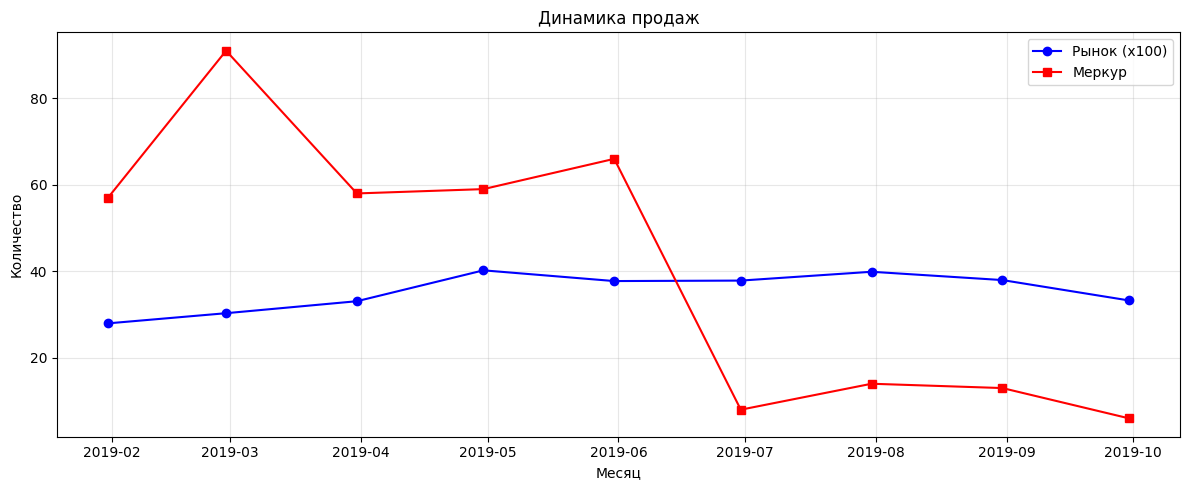

In [372]:
market_m = df.groupby('sale_date')['quantity'].sum()
mercur_m = mercur.groupby('sale_date')['quantity'].sum()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(market_m.index, market_m.values / 100, marker='o', label='Рынок (x100)', color='blue')
ax.plot(mercur_m.index, mercur_m.values, marker='s', label='Меркур', color='red')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество')
ax.set_title('Динамика продаж')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Выводы


In [373]:
mercur_rev = mercur['total_sale'].sum()
market_rev = df['total_sale'].sum()
print(f'Доля рынка: {mercur_share:.2f}% ({mercur_sales:.0f} из {total_market:.0f})')
print(f'Выручка: ${mercur_rev:,.0f} ({mercur_rev/market_rev*100:.2f}% от рынка)')
print(f'Средний чек: ${mercur_avg:,.0f} vs ${market_avg:,.0f} рынок (+{((mercur_avg/market_avg - 1) * 100):.0f}%)')
print(f'Бренды: {mercur_brands.head(3).index.tolist()}')
print(f'Регионы: {mercur_regions.head(2).index.tolist()}')
print('\nСильные стороны: премиум-сегмент, высокий чек, присутствие в Алматы и Нур-Султане')
print('Точки роста: расширение в регионы, внедорожники')

Доля рынка: 1.17% (372 из 31828)
Выручка: $14,252,523 (1.97% от рынка)
Средний чек: $38,443 vs $28,164 рынок (+37%)
Бренды: ['Volkswagen', 'Porsche', 'Audi']
Регионы: ['Алматы', 'Нур-Султан']

Сильные стороны: премиум-сегмент, высокий чек, присутствие в Алматы и Нур-Султане
Точки роста: расширение в регионы, внедорожники


## Сохранение


In [374]:
df.to_csv('autokz2019_cleaned.csv', index=False, encoding='utf-8-sig')
print(f'Сохранено: autokz2019_cleaned.csv ({df.shape[0]} x {df.shape[1]})')

Сохранено: autokz2019_cleaned.csv (17979 x 18)
